<a href="https://colab.research.google.com/github/javierespinozat/Deep-Learning/blob/master/Chest_X_Ray_Images_(Pneumonia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abstract:

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

Getting 1.24GB data from http://academictorrents.com/details/7208a86910cc518ae8feaa9021bf7f8565b97644

magnet:?xt=urn:btih:7208a86910cc518ae8feaa9021bf7f8565b97644&tr=http%3A%2F%2Facademictorrents.com%2Fannounce.php&tr=udp%3A%2F%2Ftracker.coppersurfer.tk%3A6969&tr=udp%3A%2F%2Ftracker.opentrackr.org%3A1337%2Fannounce&tr=udp%3A%2F%2Ftracker.leechers-paradise.org%3A6969

# Torrent data to Google Drive files download

source: https://github.com/r12habh/Torrent-To-Google-Drive-Downloader-v2/blob/master/Torrent_To_Google_Drive_Downloader_v2.ipynb


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [11]:
!apt install python3-libtorrent

Reading package lists...
Building dependency tree...
Reading state information...
python3-libtorrent is already the newest version (1.1.5-1build1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [13]:
import libtorrent as lt
import time
import datetime

ses = lt.session()
ses.listen_on(6881, 6891)
params = {
    'save_path': '/content/drive/My Drive/Torrent/',
    'storage_mode': lt.storage_mode_t(2),
    'paused': False,
    'auto_managed': True,
    'duplicate_is_error': True}
link = "magnet:?xt=urn:btih:7208a86910cc518ae8feaa9021bf7f8565b97644&tr=http%3A%2F%2Facademictorrents.com%2Fannounce.php&tr=udp%3A%2F%2Ftracker.coppersurfer.tk%3A6969&tr=udp%3A%2F%2Ftracker.opentrackr.org%3A1337%2Fannounce&tr=udp%3A%2F%2Ftracker.leechers-paradise.org%3A6969" # PASTE TORRENT/MAGNET LINK HERE
print(link)

handle = lt.add_magnet_uri(ses, link, params)
ses.start_dht()

begin = time.time()
print(datetime.datetime.now())

print ('Downloading Metadata...')
while (not handle.has_metadata()):
    time.sleep(1)
print ('Got Metadata, Starting Torrent Download...')

print("Starting", handle.name())

while (handle.status().state != lt.torrent_status.seeding):
    s = handle.status()
    state_str = ['queued', 'checking', 'downloading metadata', \
            'downloading', 'finished', 'seeding', 'allocating']
    print ('%.2f%% complete (down: %.1f kb/s up: %.1f kB/s peers: %d) %s ' % \
            (s.progress * 100, s.download_rate / 1000, s.upload_rate / 1000, \
            s.num_peers, state_str[s.state]))
    time.sleep(5)

end = time.time()
print(handle.name(), "COMPLETE")

print("Elapsed Time: ",int((end-begin)//60),"min :", int((end-begin)%60), "sec")

print(datetime.datetime.now())

magnet:?xt=urn:btih:7208a86910cc518ae8feaa9021bf7f8565b97644&tr=http%3A%2F%2Facademictorrents.com%2Fannounce.php&tr=udp%3A%2F%2Ftracker.coppersurfer.tk%3A6969&tr=udp%3A%2F%2Ftracker.opentrackr.org%3A1337%2Fannounce&tr=udp%3A%2F%2Ftracker.leechers-paradise.org%3A6969
2020-05-06 00:30:17.845669
Got Metadata, Starting Torrent Download...
Starting chest-xray-pneumonia.zip
7.09% complete (down: 1.7 kb/s up: 0.5 kB/s peers: 2) checking 
87.84% complete (down: 3.1 kb/s up: 3.3 kB/s peers: 2) checking 
chest-xray-pneumonia.zip COMPLETE
Elapsed Time:  0 min : 12 sec
2020-05-06 00:30:29.859755


# Data handling

In [3]:
!ls '/content/drive/My Drive/Torrent'

chest-xray-pneumonia.zip


In [4]:
!unzip '/content/drive/My Drive/Torrent/chest-xray-pneumonia.zip' -d '/content/chest-xray-pneumonia/'

Archive:  /content/drive/My Drive/Torrent/chest-xray-pneumonia.zip
  inflating: /content/chest-xray-pneumonia/chest_xray.zip  


In [5]:
!ls '/content/chest-xray-pneumonia/'

chest_xray.zip


In [6]:
!unzip '/content/chest-xray-pneumonia/chest_xray.zip' -d '/content/chest-xray-pneumonia/'

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: /content/chest-xray-pneumonia/__MACOSX/chest_xray/train/PNEUMONIA/._person1728_bacteria_4555.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person420_bacteria_1849.jpeg  
  inflating: /content/chest-xray-pneumonia/__MACOSX/chest_xray/train/PNEUMONIA/._person420_bacteria_1849.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person978_bacteria_2904.jpeg  
  inflating: /content/chest-xray-pneumonia/__MACOSX/chest_xray/train/PNEUMONIA/._person978_bacteria_2904.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person808_virus_1442.jpeg  
  inflating: /content/chest-xray-pneumonia/__MACOSX/chest_xray/train/PNEUMONIA/._person808_virus_1442.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person325_virus_664.jpeg  
  inflating: /content/chest-xray-pneumonia/__MACOSX/chest_xray/train/PNEUMONIA/._person325_virus

In [7]:
!ls '/content/chest-xray-pneumonia/chest_xray'

test  train  val


In [8]:
!ls '/content/chest-xray-pneumonia/chest_xray/test'

NORMAL	PNEUMONIA


In [9]:
!ls '/content/chest-xray-pneumonia/chest_xray/train'

NORMAL	PNEUMONIA


In [10]:
!ls '/content/chest-xray-pneumonia/chest_xray/val'

NORMAL	PNEUMONIA


# Inspecting the data

consideration:  there are 3 folders (test, train, val) already organized.

In [0]:
from IPython.display import Image

In [12]:
!ls '/content/chest-xray-pneumonia/chest_xray/test/NORMAL'

IM-0001-0001.jpeg	   NORMAL2-IM-0173-0001-0001.jpeg
IM-0003-0001.jpeg	   NORMAL2-IM-0173-0001-0002.jpeg
IM-0005-0001.jpeg	   NORMAL2-IM-0195-0001.jpeg
IM-0006-0001.jpeg	   NORMAL2-IM-0196-0001.jpeg
IM-0007-0001.jpeg	   NORMAL2-IM-0198-0001.jpeg
IM-0009-0001.jpeg	   NORMAL2-IM-0199-0001.jpeg
IM-0010-0001.jpeg	   NORMAL2-IM-0201-0001.jpeg
IM-0011-0001-0001.jpeg	   NORMAL2-IM-0206-0001.jpeg
IM-0011-0001-0002.jpeg	   NORMAL2-IM-0207-0001.jpeg
IM-0011-0001.jpeg	   NORMAL2-IM-0210-0001.jpeg
IM-0013-0001.jpeg	   NORMAL2-IM-0213-0001.jpeg
IM-0015-0001.jpeg	   NORMAL2-IM-0217-0001.jpeg
IM-0016-0001.jpeg	   NORMAL2-IM-0219-0001.jpeg
IM-0017-0001.jpeg	   NORMAL2-IM-0221-0001.jpeg
IM-0019-0001.jpeg	   NORMAL2-IM-0222-0001.jpeg
IM-0021-0001.jpeg	   NORMAL2-IM-0229-0001.jpeg
IM-0022-0001.jpeg	   NORMAL2-IM-0232-0001.jpeg
IM-0023-0001.jpeg	   NORMAL2-IM-0233-0001.jpeg
IM-0025-0001.jpeg	   NORMAL2-IM-0237-0001.jpeg
IM-0027-0001.jpeg	   NORMAL2-IM-0238-0001.jpeg
IM-0028-0001.jpeg	   NORMAL2-IM-0241-000

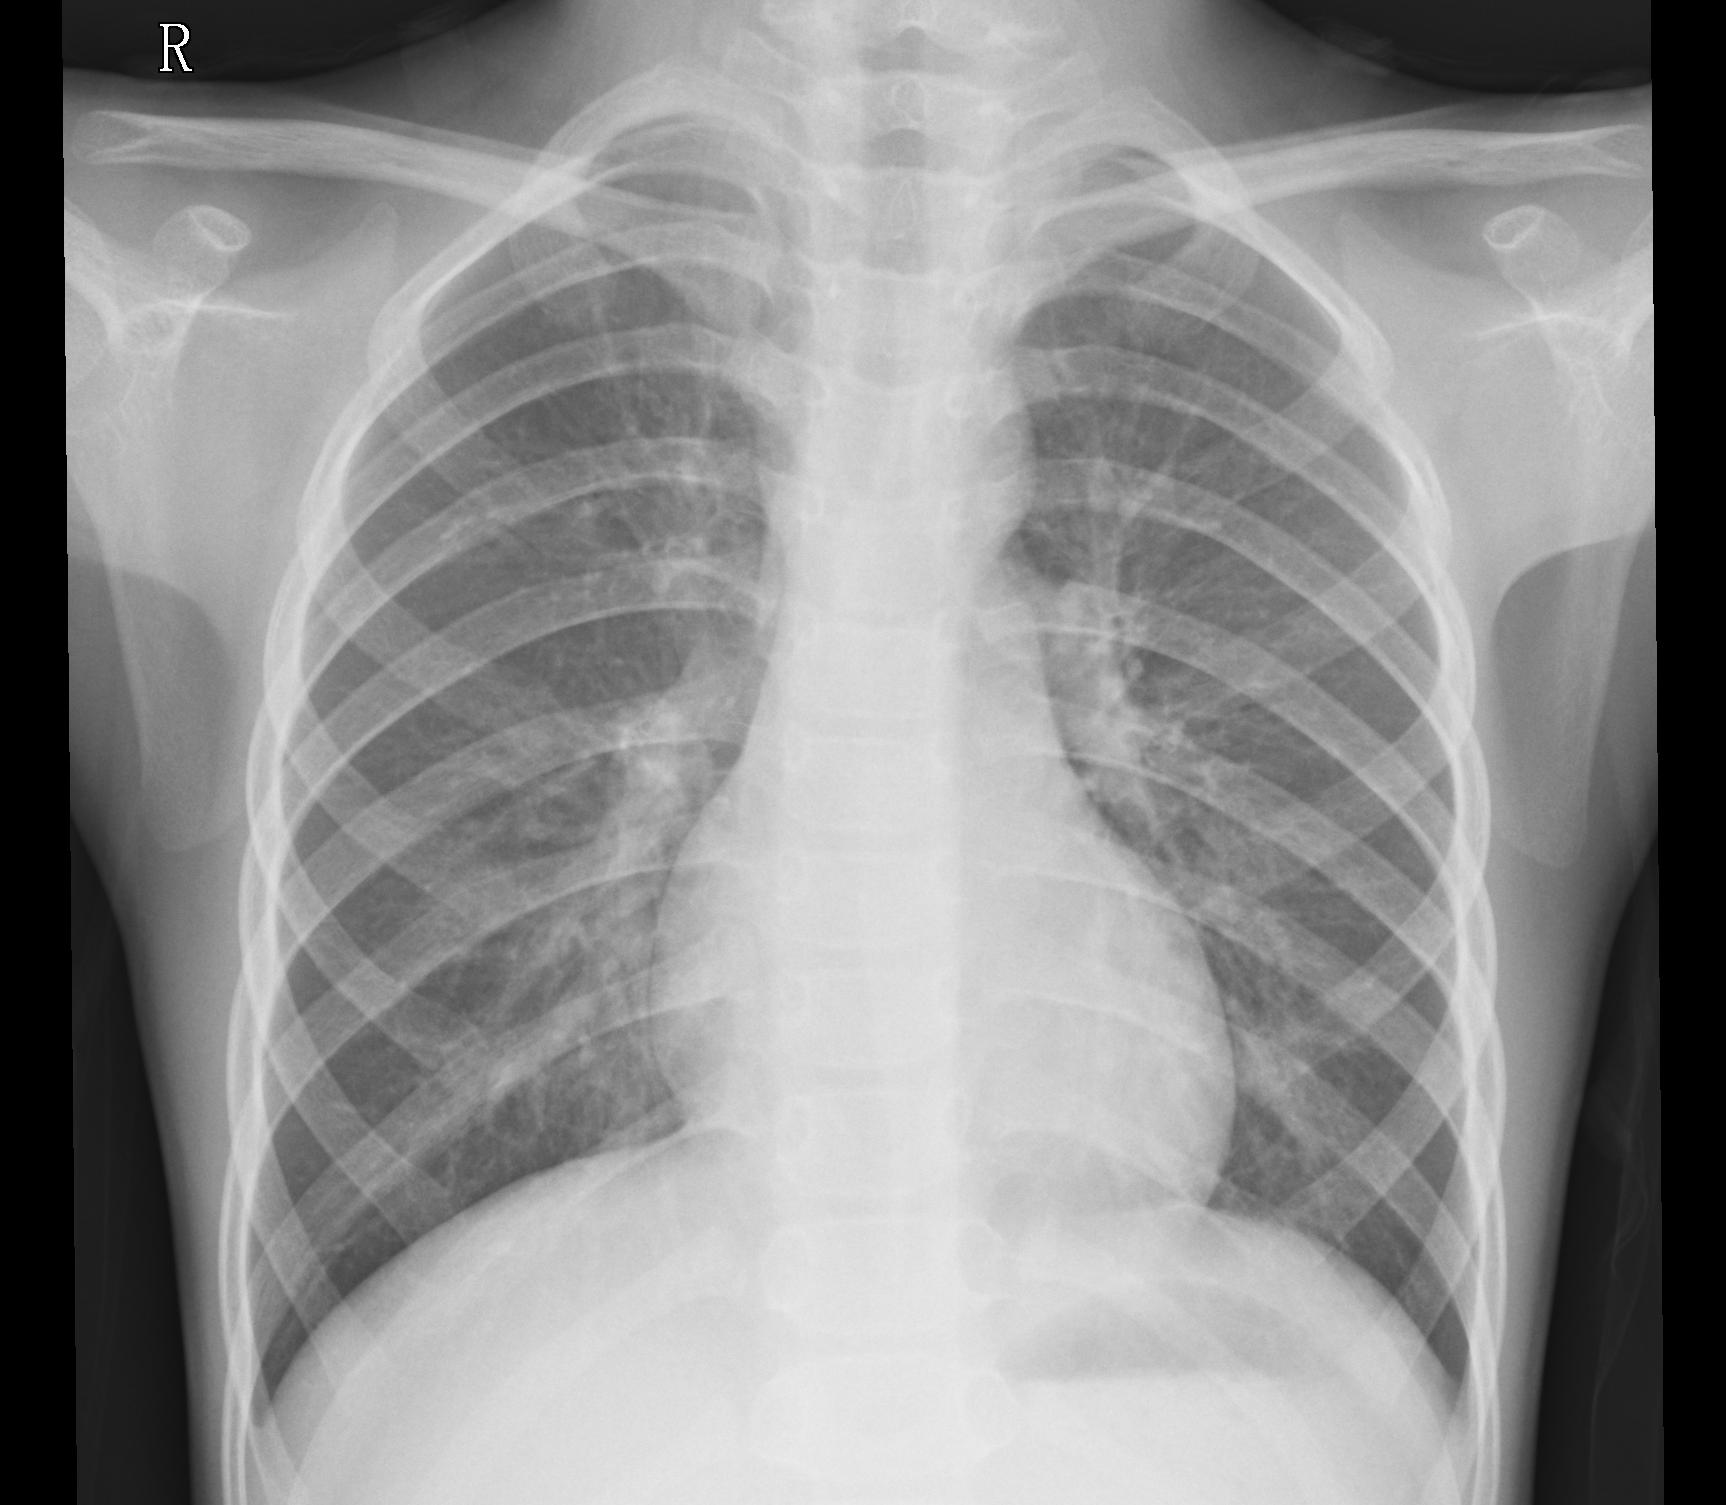

In [13]:
Image('/content/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0145-0001.jpeg')

# Testing a quick model

In [0]:
import tensorflow as tf

In [15]:
tf.__version__

'2.2.0-rc4'

In [0]:
model = tf.keras.models.Sequential([
                                    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(400, 400,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (4,4), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') #binary normal/pneumonia
                                    ])

In [42]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 398, 398, 16)      448       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 199, 199, 16)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 196, 196, 32)      8224      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 47, 47, 64)       

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
dev_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/chest-xray-pneumonia/chest_xray/train',
        target_size=(400, 400),
        batch_size=128,
        class_mode='binary')


dev_generator = dev_datagen.flow_from_directory(
        '/content/chest-xray-pneumonia/chest_xray/test', 
        target_size=(400, 400),
        batch_size=32,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [0]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [45]:
history = model.fit(
      train_generator,
      steps_per_epoch=41,  
      epochs=15,
      verbose=1,
      validation_data = dev_generator,
      validation_steps=19)

Epoch 1/15
41/41 [==============================] - 68s 2s/step - loss: 0.4888 - accuracy: 0.7987 - val_loss: 0.6221 - val_accuracy: 0.7303
Epoch 2/15
41/41 [==============================] - 68s 2s/step - loss: 0.1618 - accuracy: 0.9402 - val_loss: 0.7108 - val_accuracy: 0.7780
Epoch 3/15
41/41 [==============================] - 68s 2s/step - loss: 0.1210 - accuracy: 0.9526 - val_loss: 0.8640 - val_accuracy: 0.7632
Epoch 4/15
41/41 [==============================] - 68s 2s/step - loss: 0.0884 - accuracy: 0.9668 - val_loss: 0.6702 - val_accuracy: 0.7895
Epoch 5/15
41/41 [==============================] - 69s 2s/step - loss: 0.0751 - accuracy: 0.9720 - val_loss: 1.1802 - val_accuracy: 0.7352
Epoch 6/15
41/41 [==============================] - 69s 2s/step - loss: 0.0825 - accuracy: 0.9699 - val_loss: 1.0404 - val_accuracy: 0.7681
Epoch 7/15
41/41 [==============================] - 68s 2s/step - loss: 0.0642 - accuracy: 0.9762 - val_loss: 0.7397 - val_accuracy: 0.8191
Epoch 8/15
41/41 [==

In [46]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/content/chest-xray-pneumonia/chest_xray/val',
        target_size=(400, 400),
        class_mode='binary',
        batch_size=1)

Found 16 images belonging to 2 classes.


In [47]:
!ls '/content/chest-xray-pneumonia/chest_xray/val/PNEUMONIA'

person1946_bacteria_4874.jpeg  person1950_bacteria_4881.jpeg
person1946_bacteria_4875.jpeg  person1951_bacteria_4882.jpeg
person1947_bacteria_4876.jpeg  person1952_bacteria_4883.jpeg
person1949_bacteria_4880.jpeg  person1954_bacteria_4886.jpeg


In [48]:
!ls '/content/chest-xray-pneumonia/chest_xray/val/NORMAL'

NORMAL2-IM-1427-0001.jpeg  NORMAL2-IM-1436-0001.jpeg  NORMAL2-IM-1440-0001.jpeg
NORMAL2-IM-1430-0001.jpeg  NORMAL2-IM-1437-0001.jpeg  NORMAL2-IM-1442-0001.jpeg
NORMAL2-IM-1431-0001.jpeg  NORMAL2-IM-1438-0001.jpeg


In [49]:
predict = model.predict(test_generator, steps = 16, verbose=1)

16/16 [==============================] - 0s 12ms/step


In [50]:
import numpy as np
np.rint(predict)

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [51]:
np.rint(predict).sum()

9.0

noticing that there are 8 validation cases w/ pneumonia and 8 that are normal.

improoving the model..